# 13wk Homework

변수들중에서 `SalePrice`를 예측하기에 적절한 변수들을 조사해볼것. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
#---#
from autogluon.tabular import TabularPredictor
import autogluon.eda.auto as auto
#---#
import warnings
warnings.filterwarnings('ignore')

In [4]:
!kaggle competitions download -c house-prices-advanced-regression-techniques
!unzip house-prices-advanced-regression-techniques.zip

100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 851kB/s]
100%|█████████████████████████████████████████| 199k/199k [00:00<00:00, 849kB/s]
Archive:  house-prices-advanced-regression-techniques.zip
  inflating: data_description.txt    
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


In [5]:
df_submission = pd.read_csv("sample_submission.csv")
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [6]:
!rm sample_submission.csv
!rm train.csv
!rm test.csv
!rm data_description.txt
!rm house-prices-advanced-regression-techniques.zip

## Target variable analysis

,count,mean,std,min,25%,50%,75%,max,dtypes,unique,missing_count,missing_ratio,raw_type,special_types
SalePrice,1460,180921.19589,79442.502883,34900.0,129975.0,163000.0,214000.0,755000.0,int64,663,,,int,


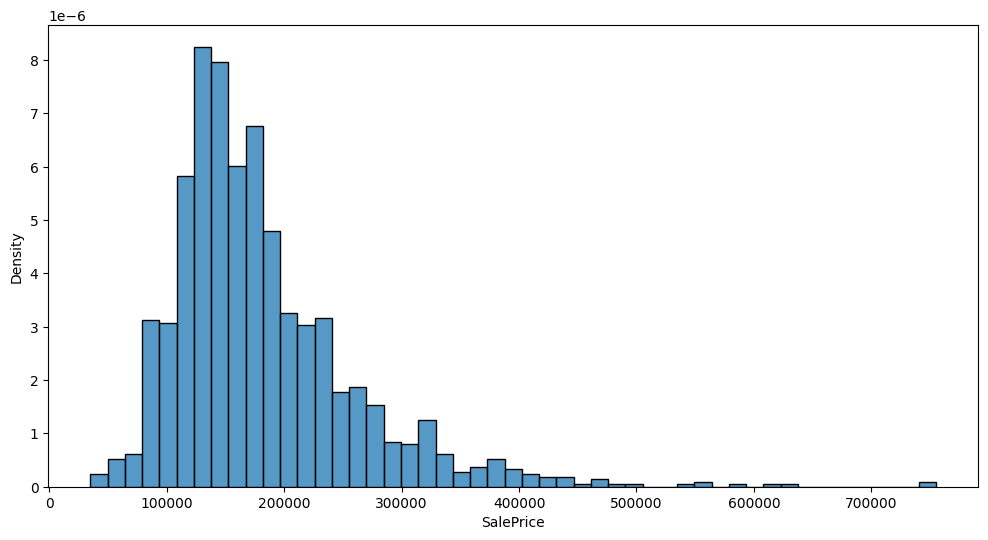

### Target variable correlations

**`train_data` - `spearman` correlation matrix; focus: absolute correlation for `SalePrice` >= `0.5`**

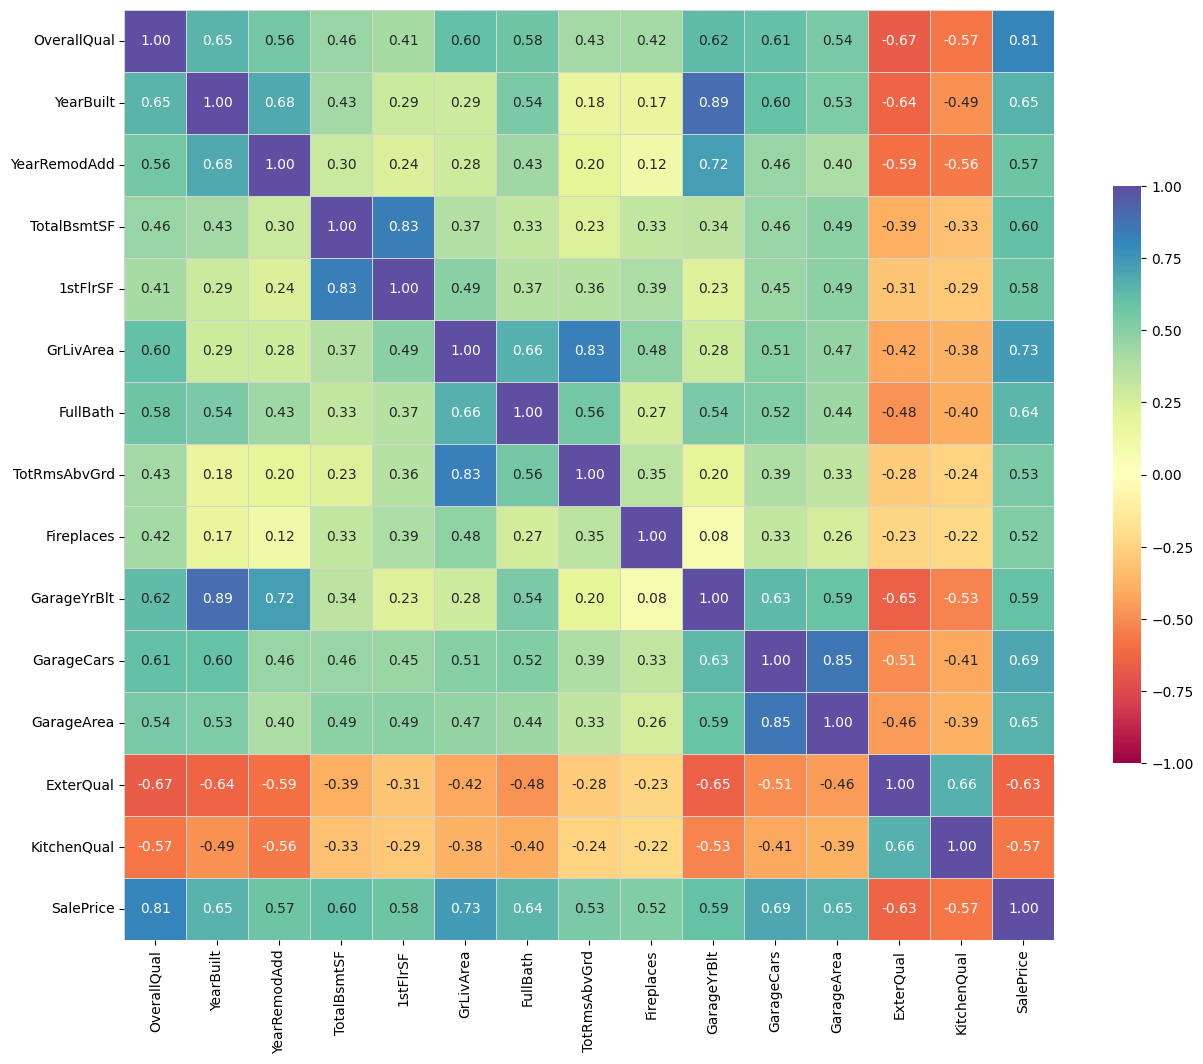

**Feature interaction between `OverallQual`/`SalePrice` in `train_data`**

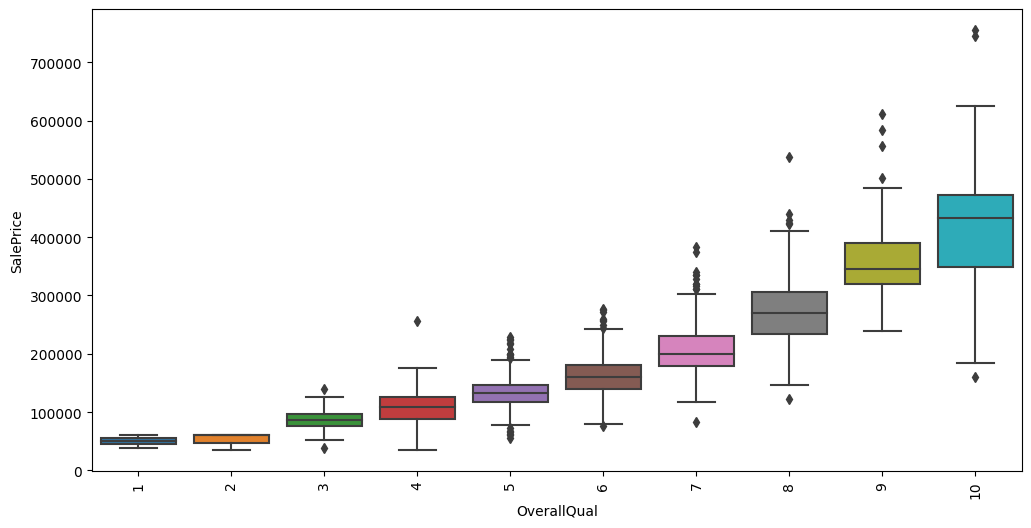

**Feature interaction between `GrLivArea`/`SalePrice` in `train_data`**

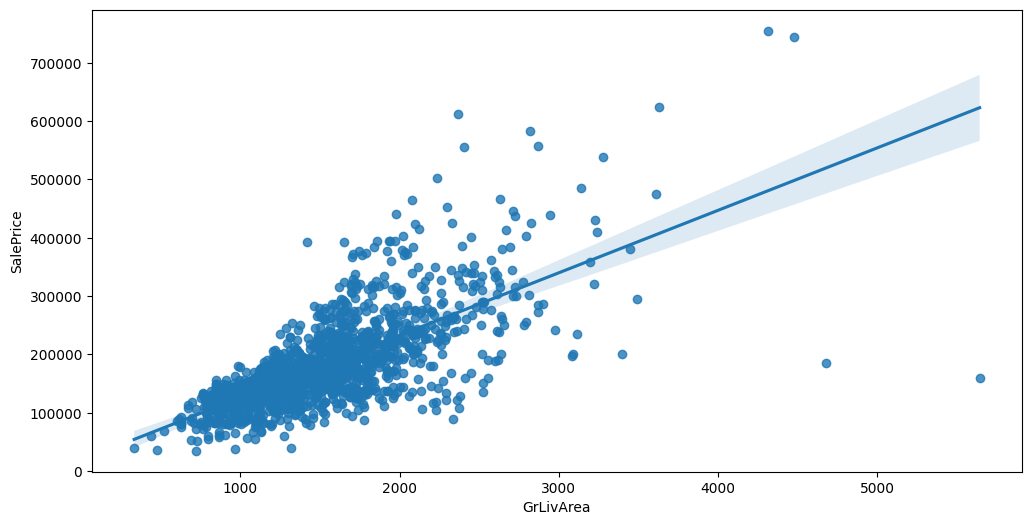

**Feature interaction between `GarageCars`/`SalePrice` in `train_data`**

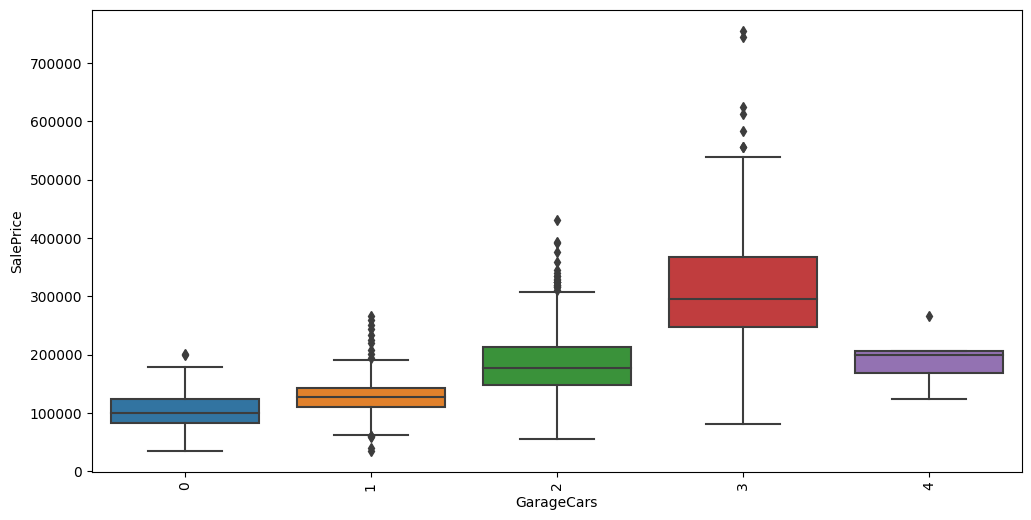

**Feature interaction between `YearBuilt`/`SalePrice` in `train_data`**

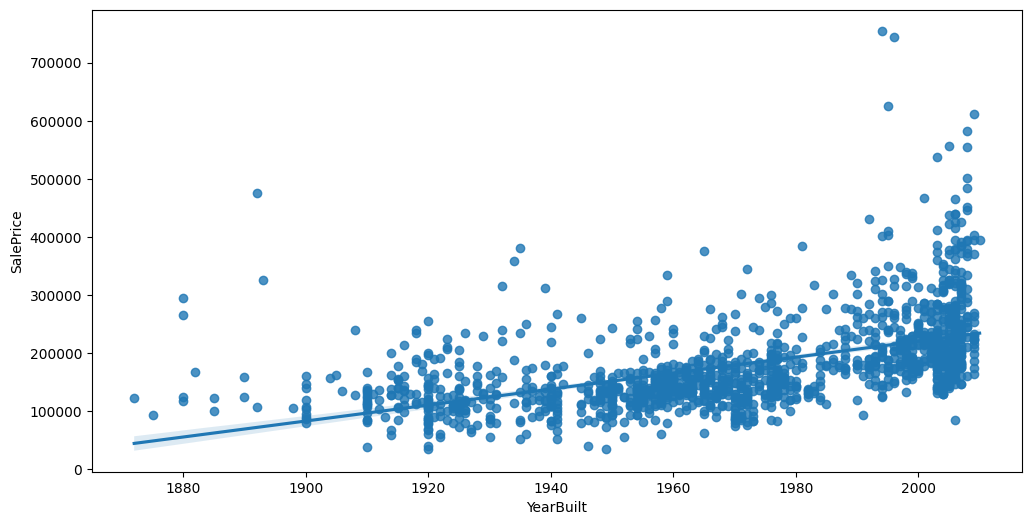

**Feature interaction between `GarageArea`/`SalePrice` in `train_data`**

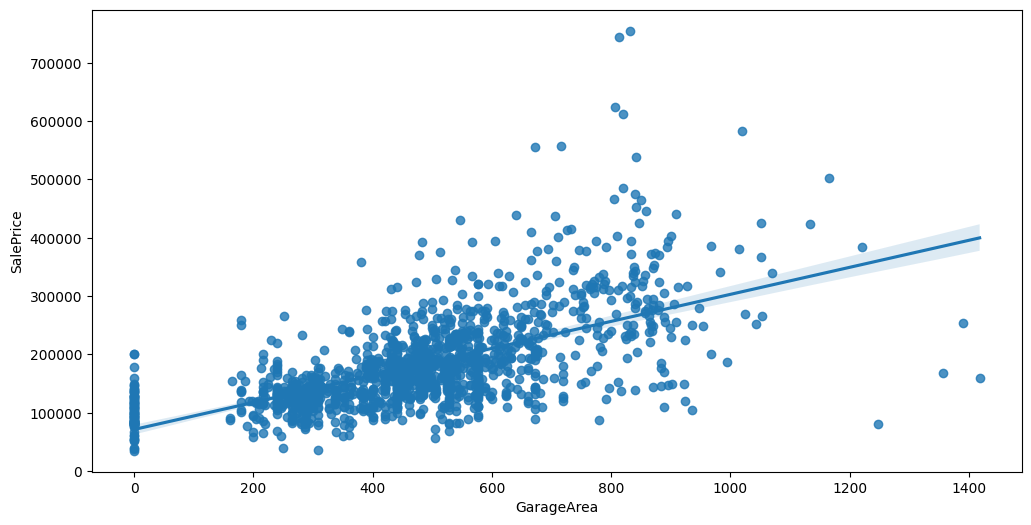

**Feature interaction between `FullBath`/`SalePrice` in `train_data`**

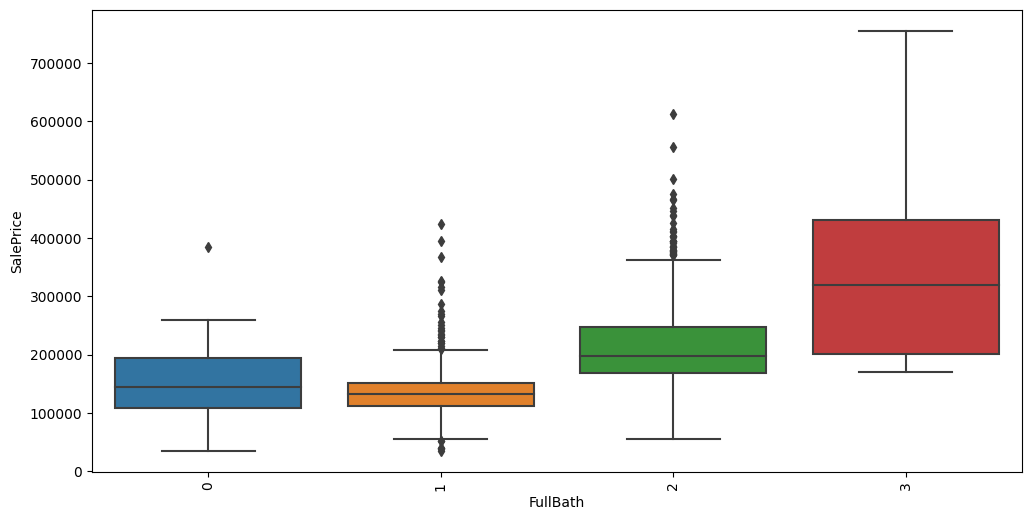

**Feature interaction between `TotalBsmtSF`/`SalePrice` in `train_data`**

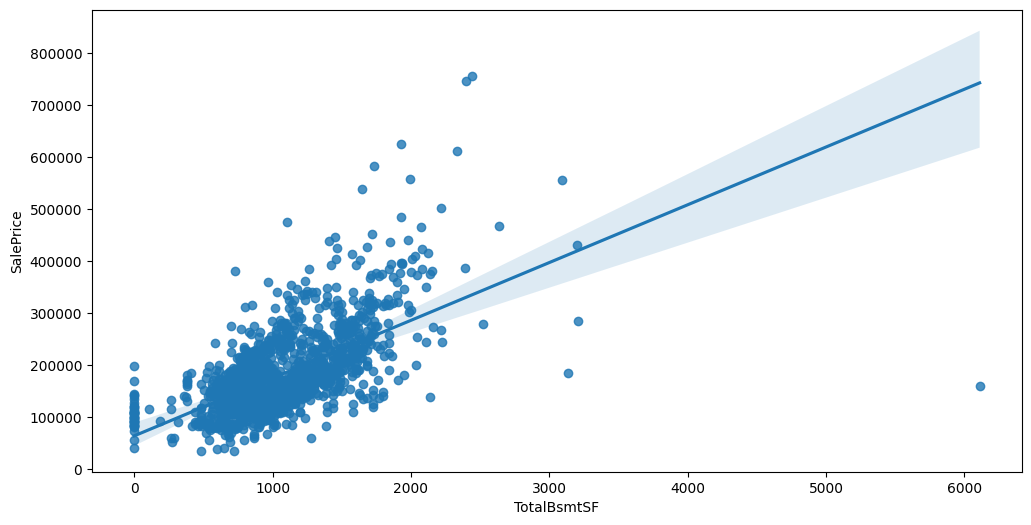

**Feature interaction between `GarageYrBlt`/`SalePrice` in `train_data`**

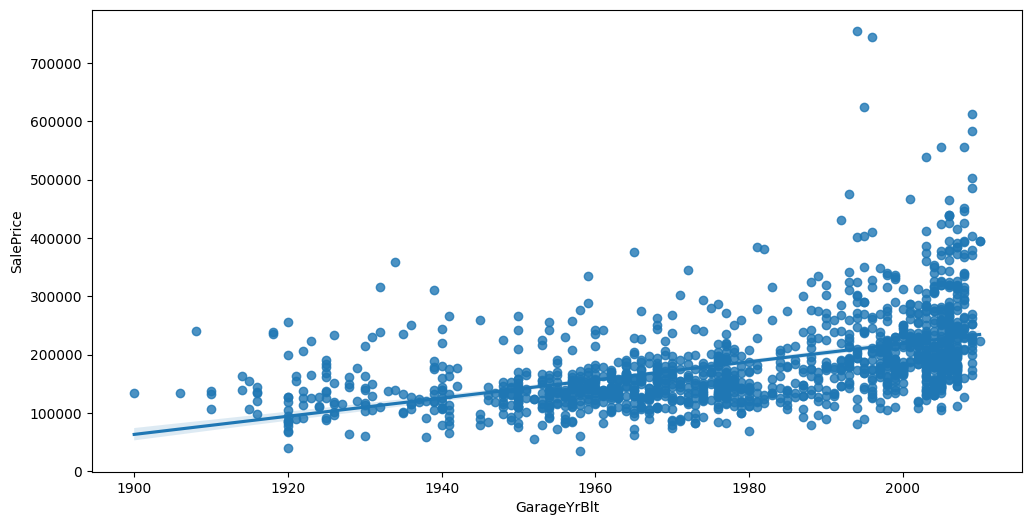

**Feature interaction between `1stFlrSF`/`SalePrice` in `train_data`**

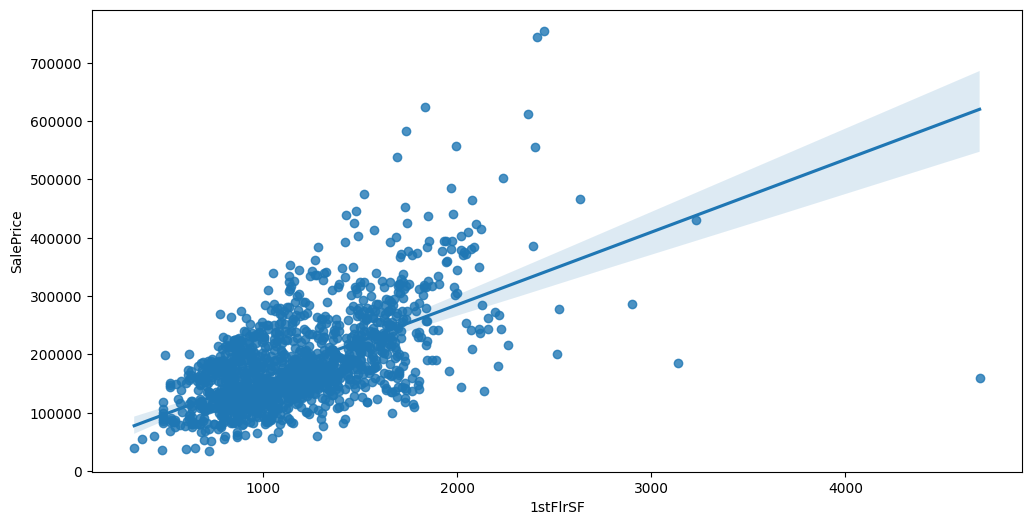

**Feature interaction between `YearRemodAdd`/`SalePrice` in `train_data`**

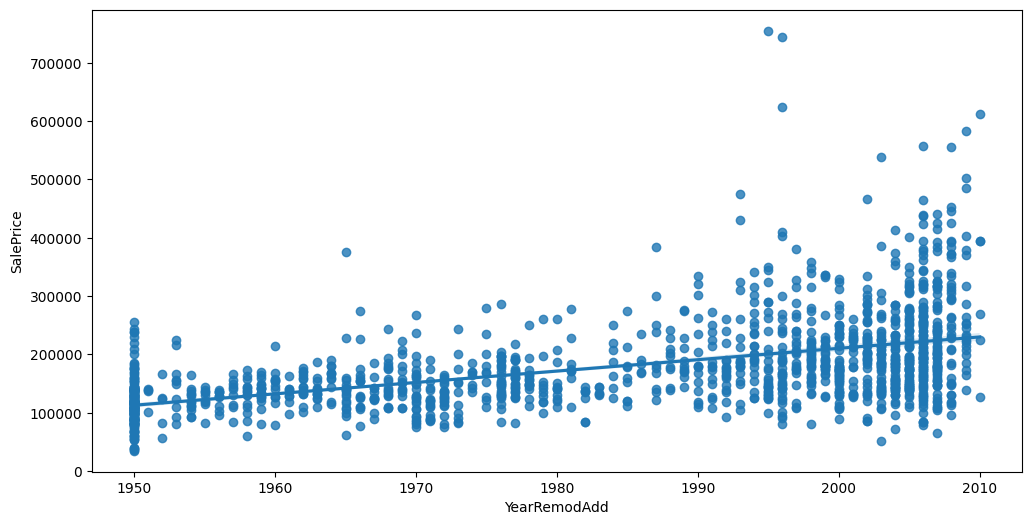

**Feature interaction between `TotRmsAbvGrd`/`SalePrice` in `train_data`**

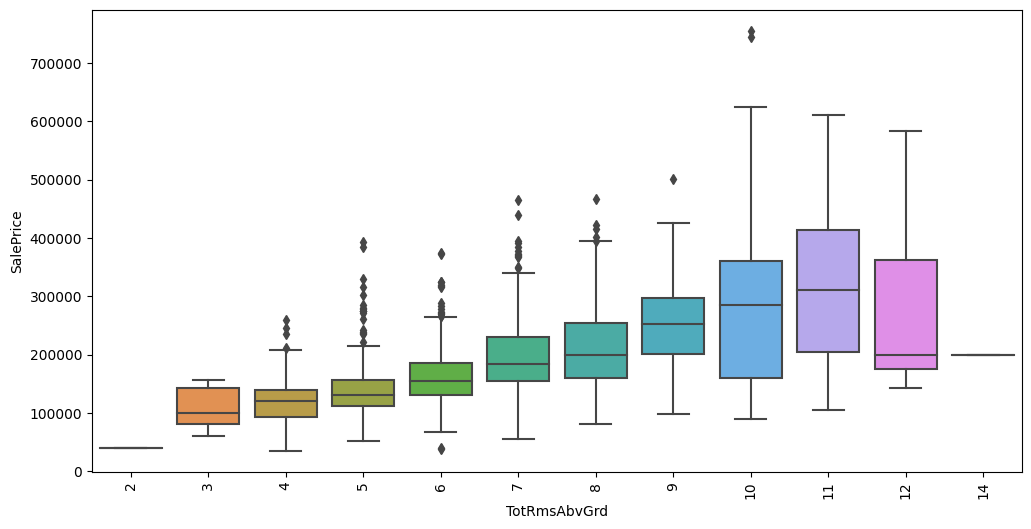

**Feature interaction between `Fireplaces`/`SalePrice` in `train_data`**

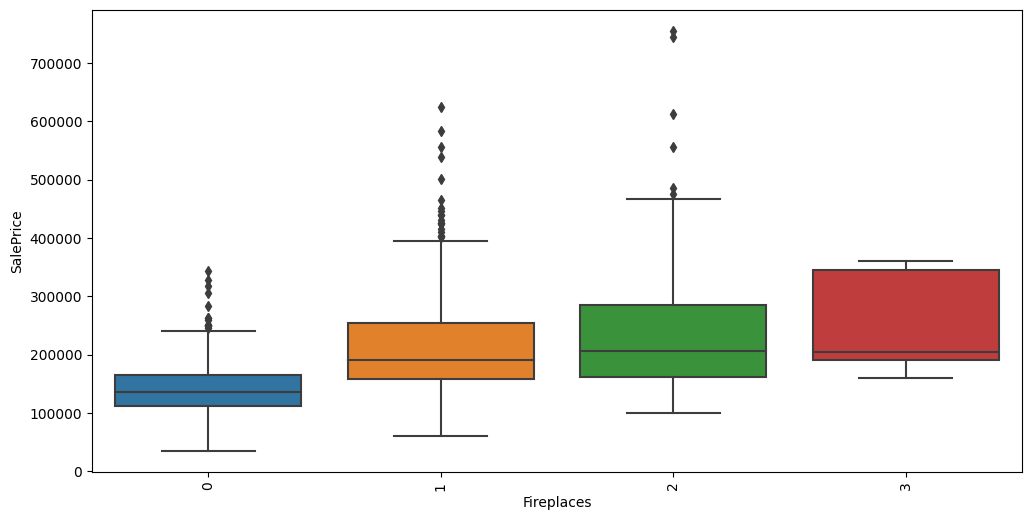

**Feature interaction between `KitchenQual`/`SalePrice` in `train_data`**

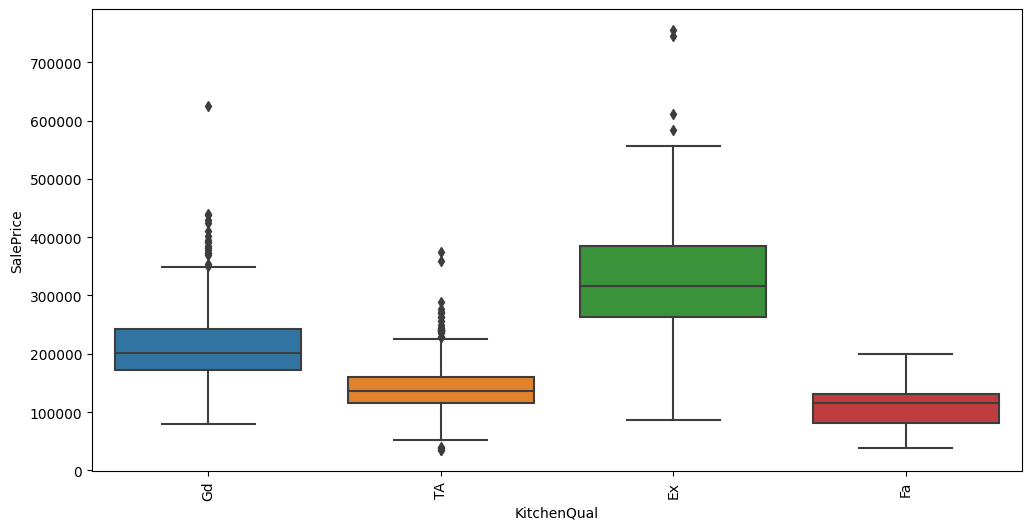

**Feature interaction between `ExterQual`/`SalePrice` in `train_data`**

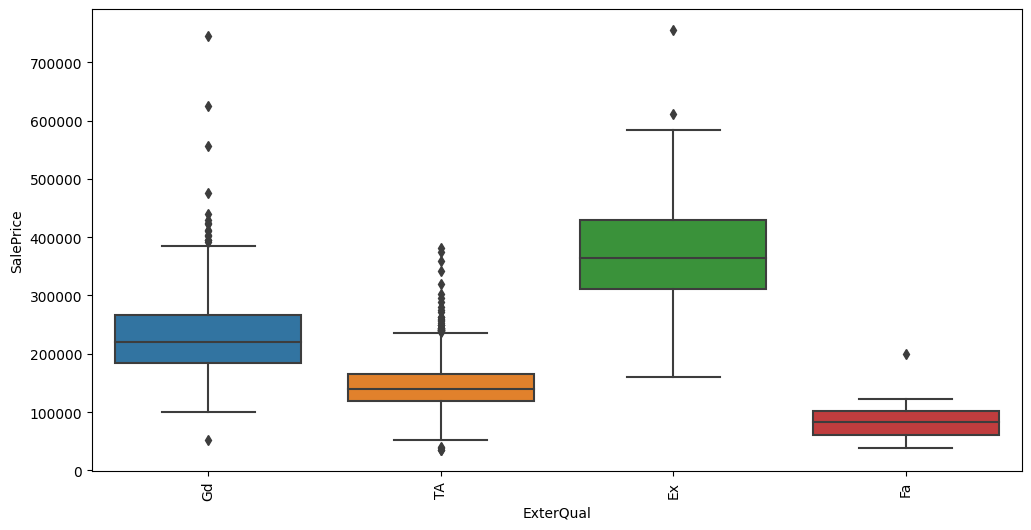

In [7]:
auto.target_analysis(
    train_data = df_train,
    label = 'SalePrice',
    fit_distributions=False
)

- `SalePrice`의 분포는 오른쪽으로 꼬리가 매우 긴 분포로 변수변환(ex. 로그변환)이 필요해보인다.
- 전체적인 집의 퀄리티(`OverallQual`)나 집의 연식(`YearBuilt`)이 `SalePrice`와 매우 높은 상관관계를 갖고 있으므로 분석 시 해당 변수를 고려하면 좋을 것 같다.
- `TotalBsmtSF`/`1stFlrSF` 혹은 `GarageArea`/`GarageCars` 등은 높은 상관관계가 있어 다중공선성을 고려한다. 라쏘나 릿지를 사용하거나 둘 중 하나의 변수만 사용하는 것을 고려해 볼 수 있을 것 같다.

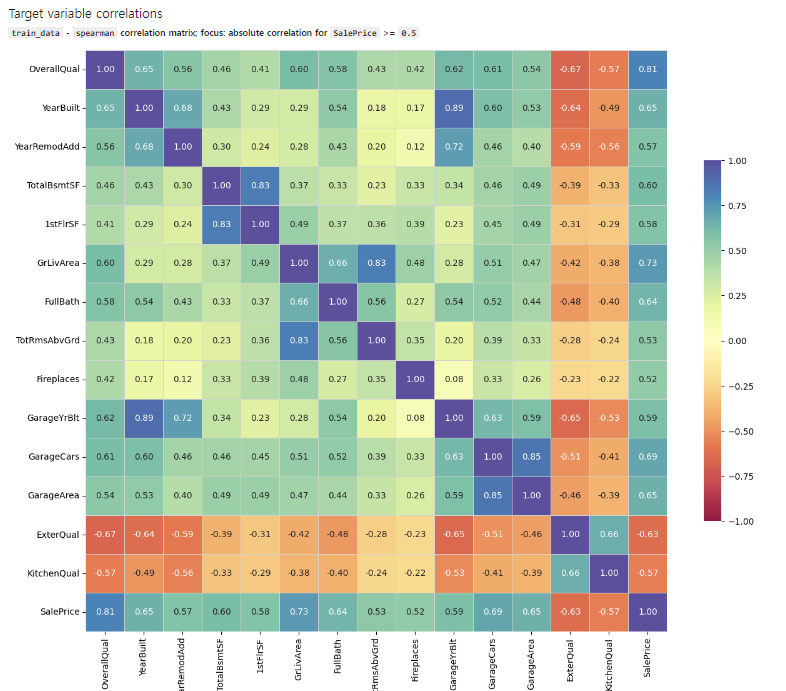